In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df1= pd.read_csv('Car name.csv')
df1.head(5)

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [2]:
df2= pd.read_json("Car-Attributes.json")
df2.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [3]:
car= pd.concat([df1, df2], ignore_index=False, axis=1)
car.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
car.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [5]:
car.shape

(398, 9)

In [6]:
car.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
car.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [9]:
car.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [10]:
car['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

There are strings with '?'. We have find and impute if it is necessary with the other values. or we may drop them later.

In [11]:
print((car['hp']=='?').sum(),'with =? out of', {car.shape[0]})
car.loc[car['hp']=='?',:]

6 with =? out of {398}


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [12]:
car['hp'].replace('?', np.nan, inplace=True)
car['hp'] = car['hp'].astype(float)

In [13]:
car.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


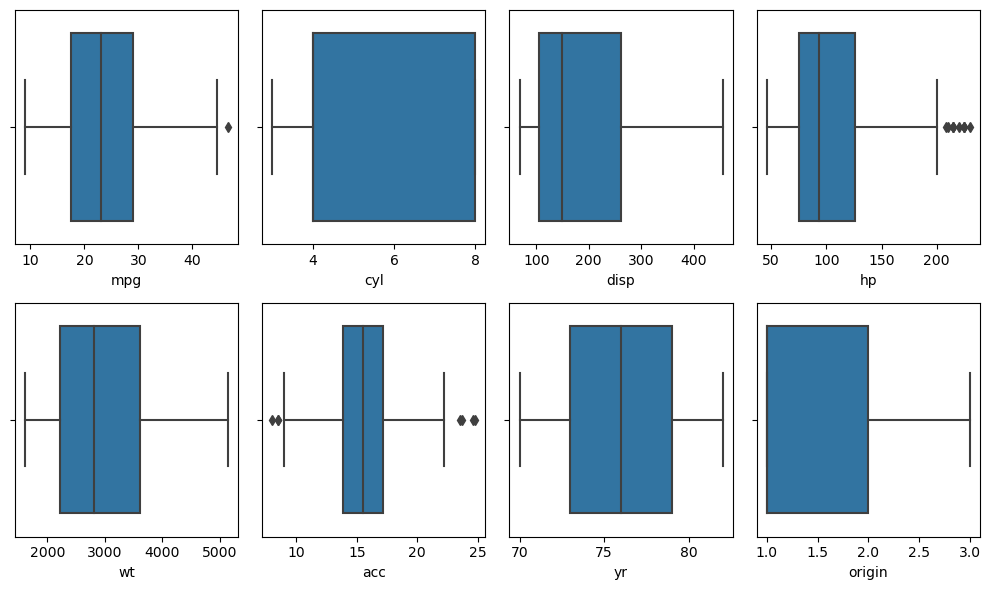

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(2,4,1)
sns.boxplot(data=car, x='mpg')

plt.subplot(2,4,2)
sns.boxplot(data=car, x='cyl')

plt.subplot(2,4,3)
sns.boxplot(data=car, x='disp')

plt.subplot(2,4,4)
sns.boxplot(data=car, x='hp')

plt.subplot(2,4,5)
sns.boxplot(data=car, x='wt')

plt.subplot(2,4,6)
sns.boxplot(data=car, x='acc')

plt.subplot(2,4,7)
sns.boxplot(data=car, x='yr')

plt.subplot(2,4,8)
sns.boxplot(data=car, x='origin')

plt.tight_layout()
plt.show()


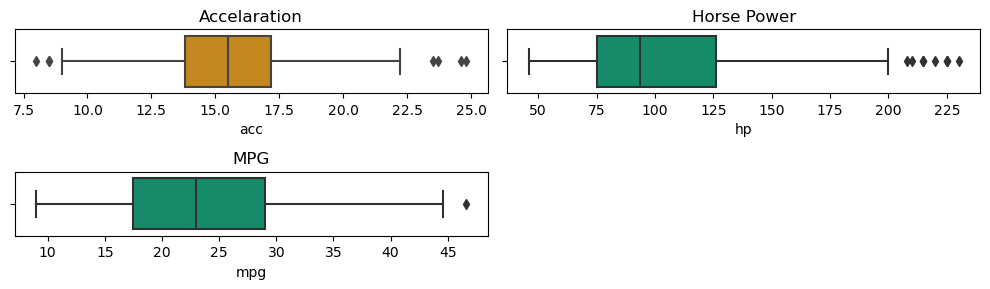

In [15]:
palette = sns.color_palette("colorblind")
plt.figure(figsize=(10,3))
plt.subplot(2,2,1)
plt.title('Accelaration')
sns.boxplot(car, x='acc', color= palette[1])
plt.subplot(2,2,2)
plt.title('Horse Power')
sns.boxplot(car, x='hp', color=palette[2])
plt.tight_layout()
plt.show;
plt.subplot(2,2,3)
plt.title('MPG')
sns.boxplot(car, x='mpg', color=palette[2])
plt.tight_layout()
plt.show;

Insights from Boxplot:
    Outliers:
    
    Accelaration: 6
    Horse Power: 6
    MPG: 1

car_name    0.00
mpg         0.00
cyl         0.00
disp        0.00
hp          1.51
wt          0.00
acc         0.00
yr          0.00
origin      0.00
dtype: float64


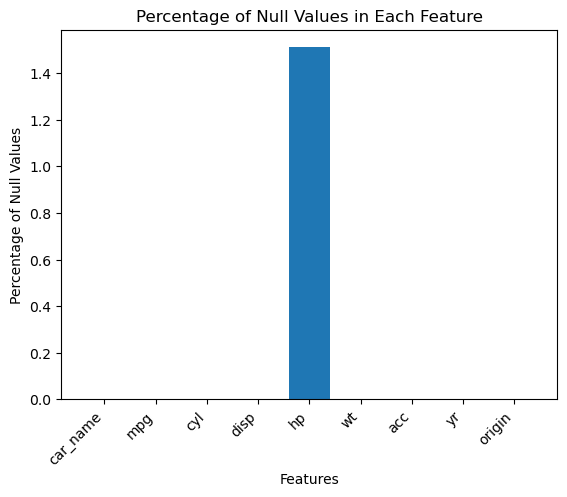

In [16]:
null_percentage = (car.isnull().mean() * 100).round(2)
print(null_percentage)
plt.bar(null_percentage.index, null_percentage)
plt.xlabel('Features')
plt.ylabel('Percentage of Null Values')
plt.title('Percentage of Null Values in Each Feature')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
#drop the null values of 'Hp'
car= car.dropna()
null_percentage = (car.isnull().mean() * 100).round(2)
print(null_percentage)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


There are no Null values.

In [18]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    float64
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [19]:
car.shape

(392, 9)

In [20]:
duplicate= car.duplicated()
duplicate.sum()

0

There are no duplicated rows in the data

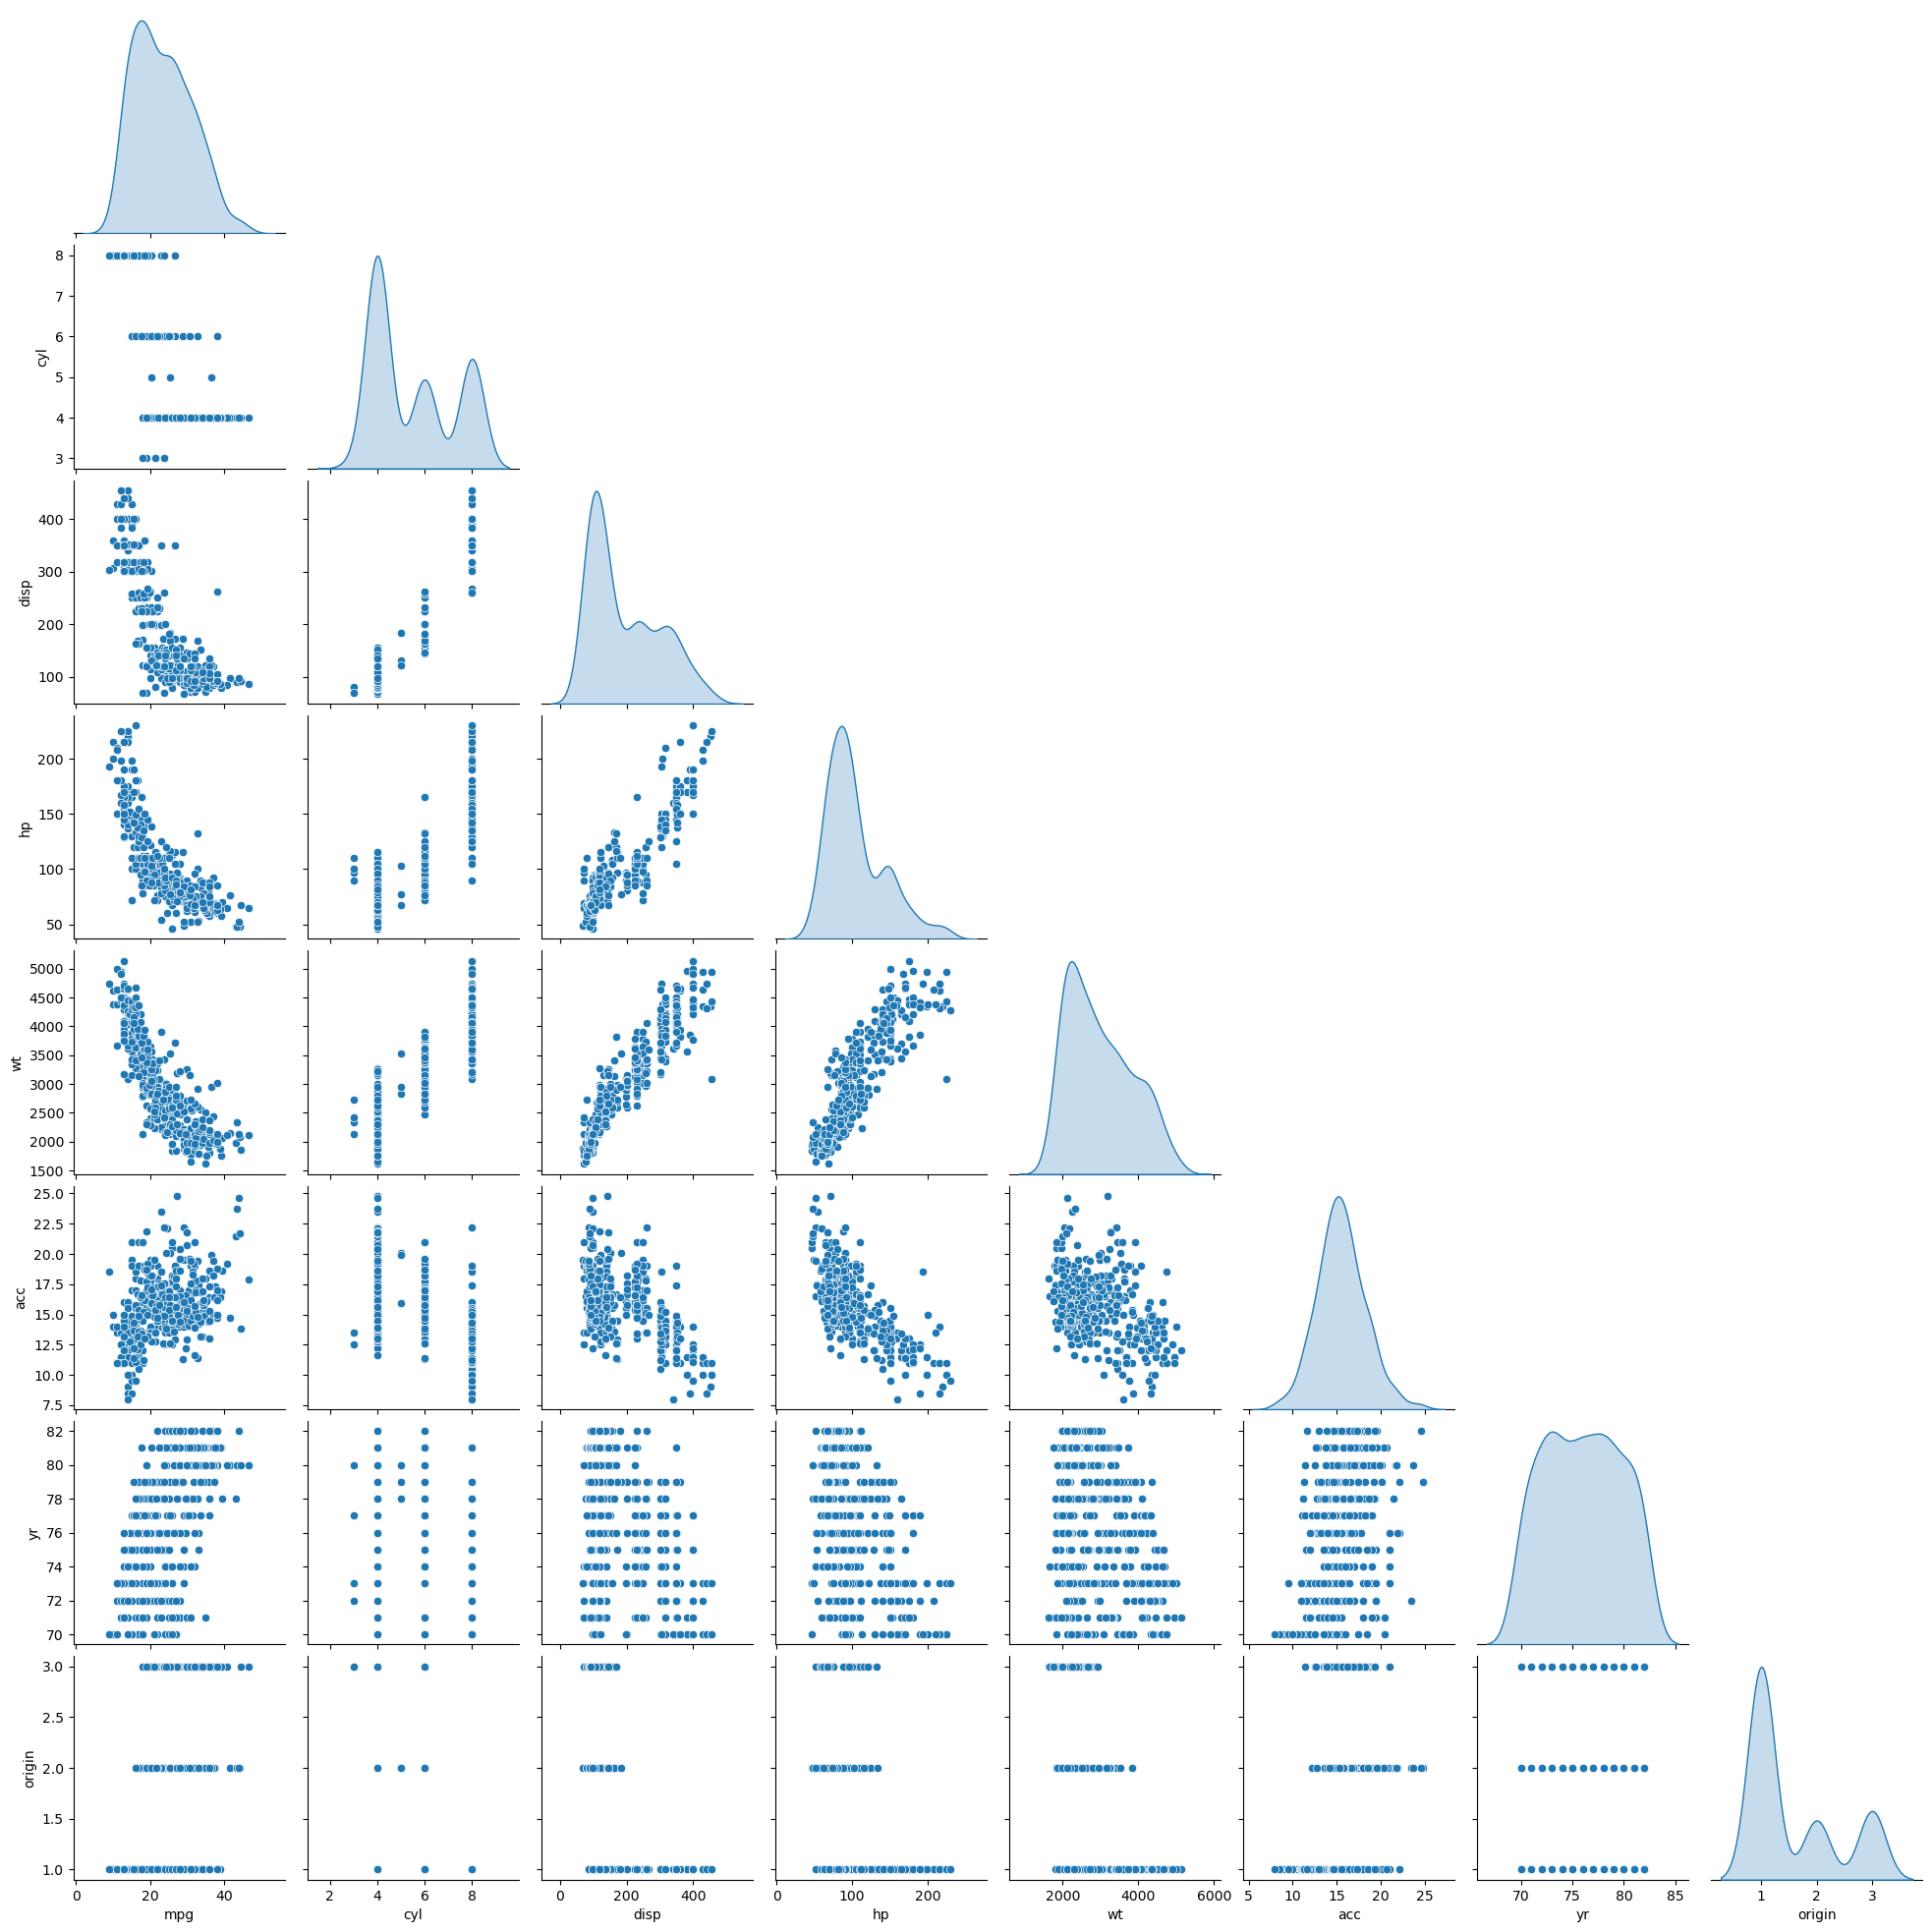

In [21]:
sns.pairplot(car, diag_kind= 'kde', corner= True)
plt.show()

#### Positive Correlation:
        Weight, Displacement and Horsepower

#### Negative Correlation:
        MPG Vs weight, Displacemetn and HP

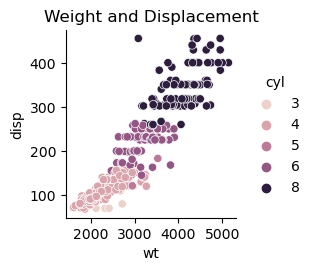

In [22]:
sns.pairplot(car, kind='scatter', hue='cyl',x_vars='wt', y_vars='disp')
plt.title('Weight and Displacement')
plt.show()


- 'Displacement', 'Weight' and 'Cylinders' are possitively correlated.
-  By the time weight and displacement increase the count of cylinders also increased.


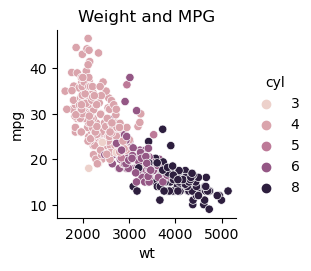

In [24]:
sns.pairplot(car, kind='scatter', hue='cyl',x_vars='wt', y_vars='mpg')
plt.title('Weight and MPG')
plt.show()

MPG is negatively correlated with both Weight and Cylinders attributes.
Mostly 4 cylinders are present in the overall data available


### Clustering

In [25]:
from sklearn.cluster import KMeans
from scipy.stats import zscore #for standardize the data with '0' mean and '1' SD
from scipy.spatial.distance import cdist # to caluculate the distance

In [26]:
carattributes= car.iloc[:,1:]
carattributes.head(5)
# defined all the numerical data into one data frame as 'carattributes'

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [27]:
carscaled= carattributes.apply(zscore) #apply the zscore for standardization
carscaled.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


In [28]:
# got some future and user warnings, so that I imported "Warnings".
import warnings
warnings.filterwarnings("ignore")

clusters= range(2, 11) #applying the clusters from 2 to 10.
averagedistortion=[]
#define the model
for k in clusters:
    kmodel= KMeans(n_clusters=k, n_init=10)
    kmodel.fit(carscaled)
    prediction= kmodel.predict(carscaled)
    averagedistortion.append(sum(np.min(cdist(carscaled, kmodel.cluster_centers_, metric='euclidean'), axis=1))/carscaled.shape[0])
#cdist for distance measure has done using the Euclidean metics.


-- List now contains the mean distortions for each value of K in the specified range. After running this code, you can use the values in meanDistortions to analyze the elbow point in the distortion curve, helping you choose the optimal number of clusters for your K-means algorithm.


<function matplotlib.pyplot.show(close=None, block=None)>

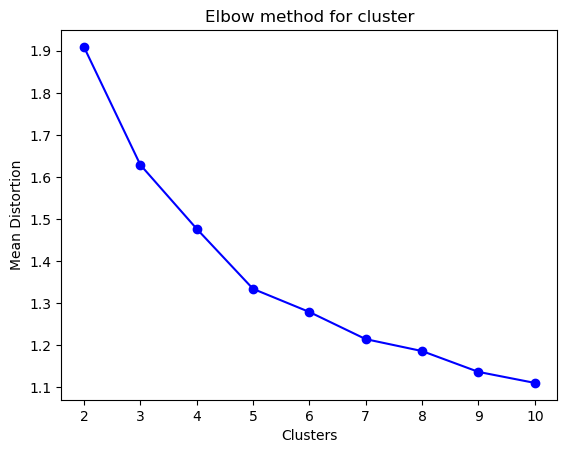

In [29]:
plt.plot(clusters, averagedistortion,'bo-'); #plot for the visualization.
plt.ylabel('Mean Distortion')
plt.xlabel('Clusters')
plt.title('Elbow method for cluster')
plt.tight_layout
plt.show

From the Elbow method We could see that "cluster= 5" is the optimal one. After that plot is getting elbow bend.

In [30]:
#Form the above curve we can see that 5 clusters is the best option for the model.

best_model= KMeans(n_clusters=5)
best_model.fit(carscaled)
best_prediction= best_model.predict(carscaled)

In [31]:
car['Group']= best_prediction
carscaled['Group']= best_prediction
carscaled.head(20)

,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641,0
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641,0
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641,0
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641,0
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641,0
5,-1.083498,1.483947,2.244637,2.433030,1.607198,-2.011120,-1.625315,-0.716641,0
6,-1.211785,1.483947,2.483848,3.005320,1.622523,-2.374052,-1.625315,-0.716641,0
7,-1.211785,1.483947,2.349890,2.875254,1.573013,-2.555517,-1.625315,-0.716641,0
8,-1.211785,1.483947,2.493416,3.135386,1.706218,-2.011120,-1.625315,-0.716641,0
9,-1.083498,1.483947,1.871469,2.224924,1.028406,-2.555517,-1.625315,-0.716641,0


In [32]:
car.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,0


In [33]:
car_new= {'mpg': 33, 'cyl':8, 'disp':130,'hp':83, 'wt':2750, 'acc':18.5, 'yr': 80, 'origin':2 }

In [34]:
car.tail()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1,2
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2,3
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,2
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1,2
397,chevy s-10,31.0,4,119.0,82.0,2720,19.4,82,1,2


In [35]:
clustgroup= car.groupby('Group')
clustgroup.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
Group,,,,,,,,
0,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000
1,24.614458,4.048193,108.728916,85.578313,2351.253012,16.072289,73.337349,2.120482
2,28.960000,4.200000,132.169231,82.538462,2551.307692,16.523077,79.630769,1.076923
3,34.035714,4.085714,99.728571,72.285714,2158.057143,16.740000,79.385714,2.785714
4,19.081250,6.225000,233.862500,101.987500,3303.875000,16.627500,75.725000,1.037500


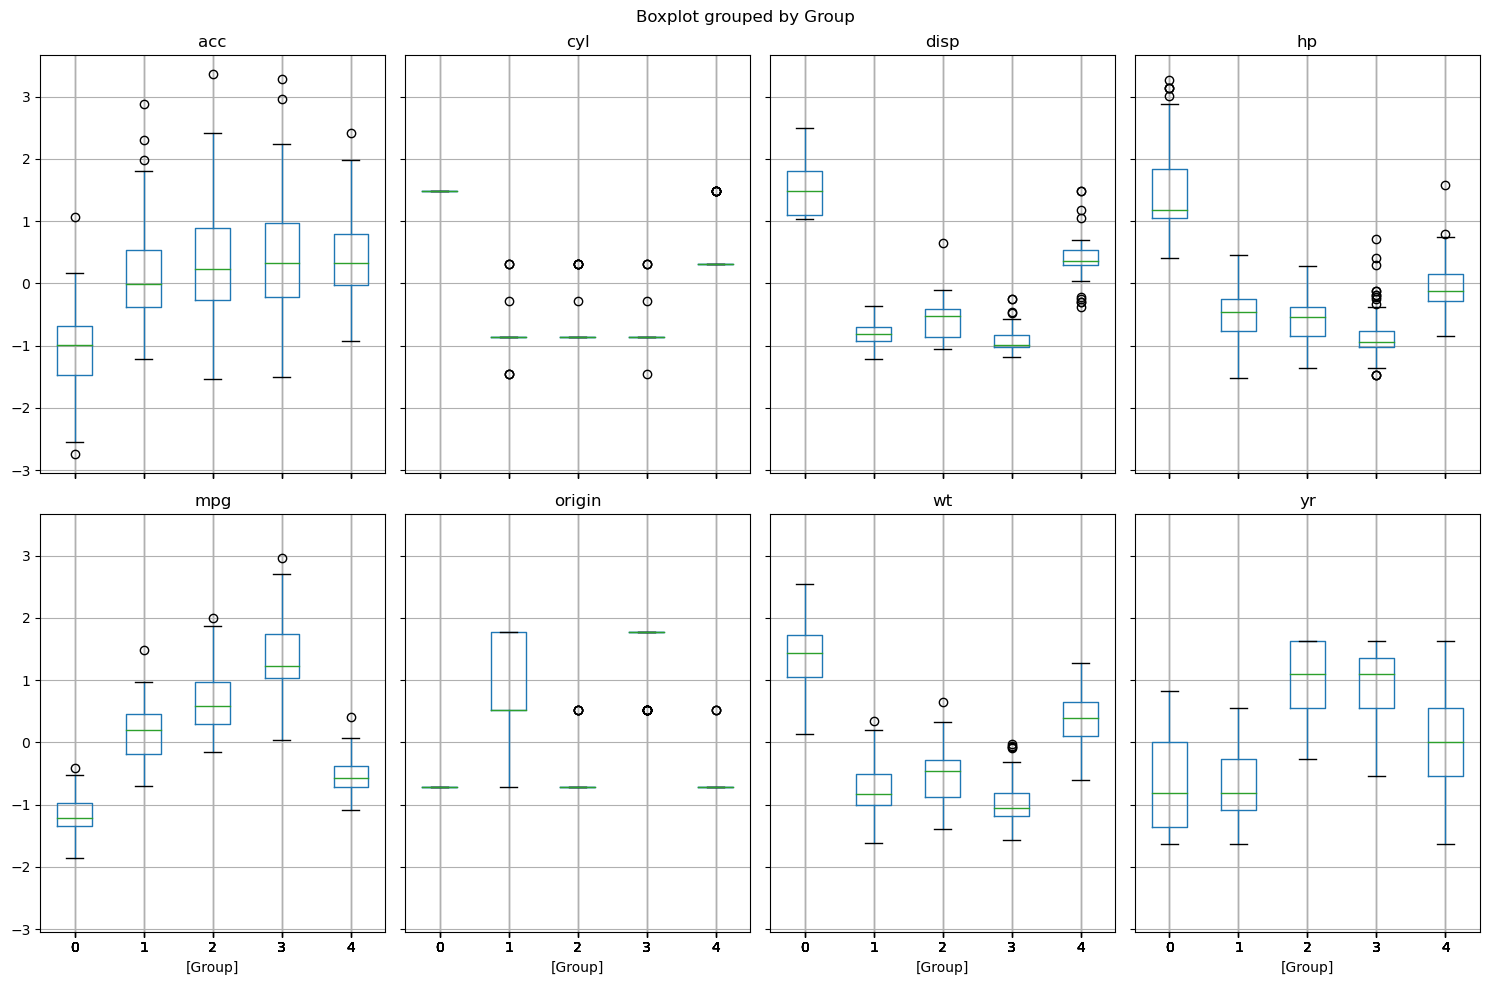

In [36]:
carscaled.boxplot(by='Group', layout = (2,4),figsize=(15,10))
plt.tight_layout()
plt.show()

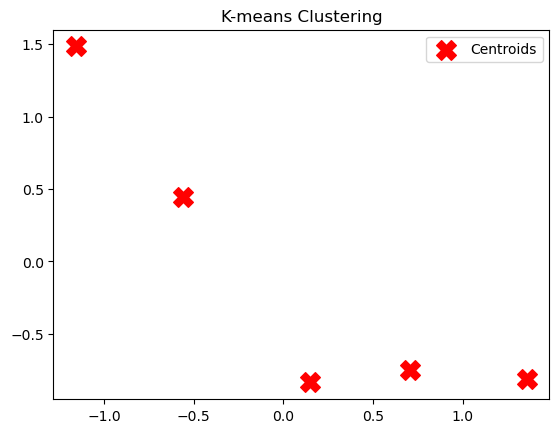

In [37]:
plt.scatter(best_model.cluster_centers_[:, 0], best_model.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [38]:
numerical_columns = car.select_dtypes(include=['float64', 'int64'])
print("Numerical Columns:")
numerical_columns


Numerical Columns:


,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


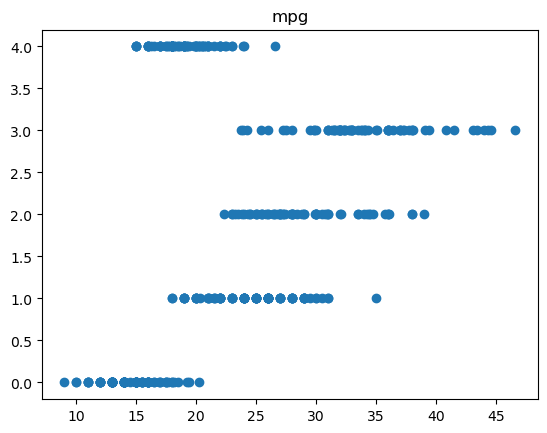

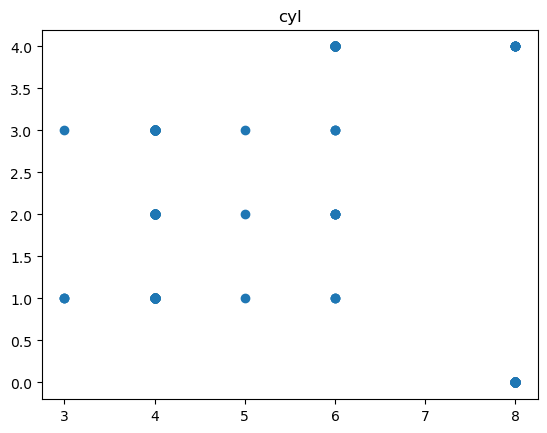

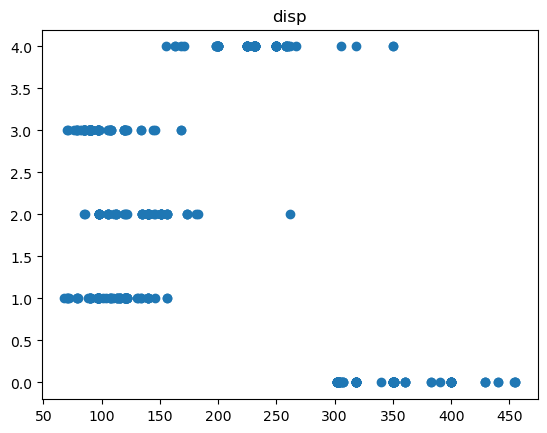

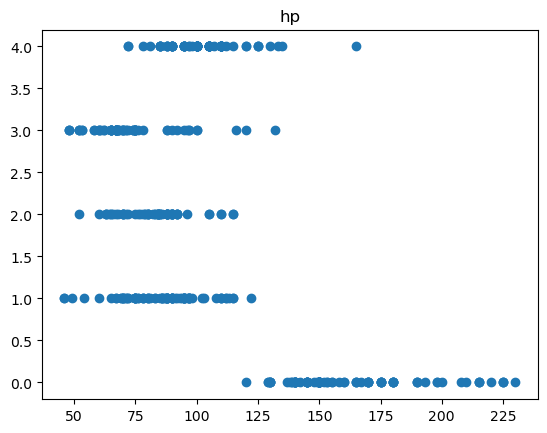

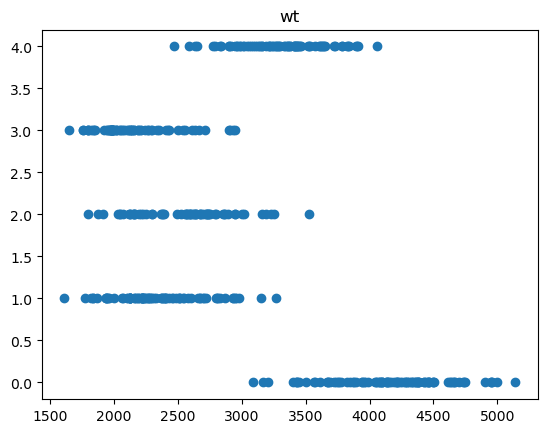

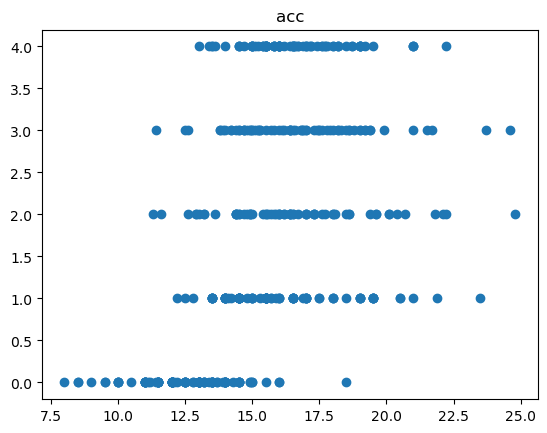

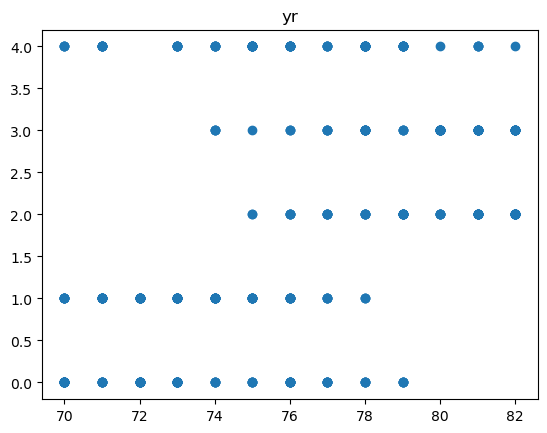

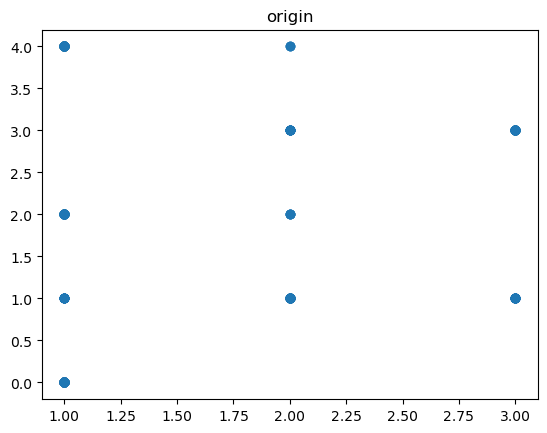

In [39]:
for i in numerical_columns:
    plt.subplots()
    plt.scatter(car[i], car['Group'] )
    plt.title(i)
    plt.show

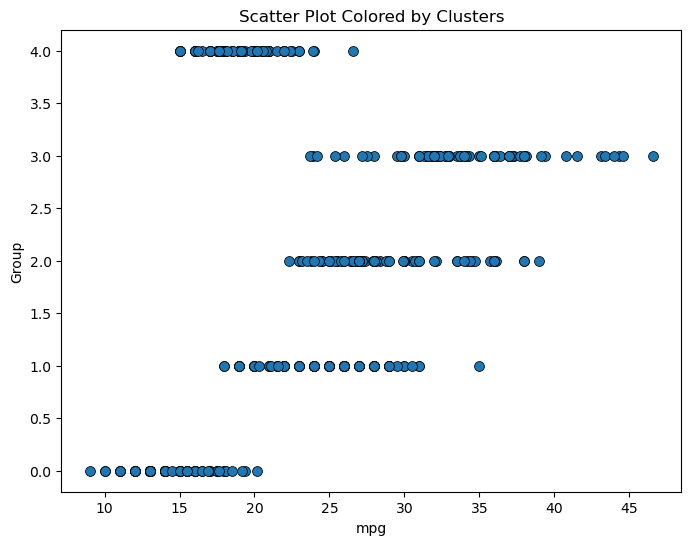

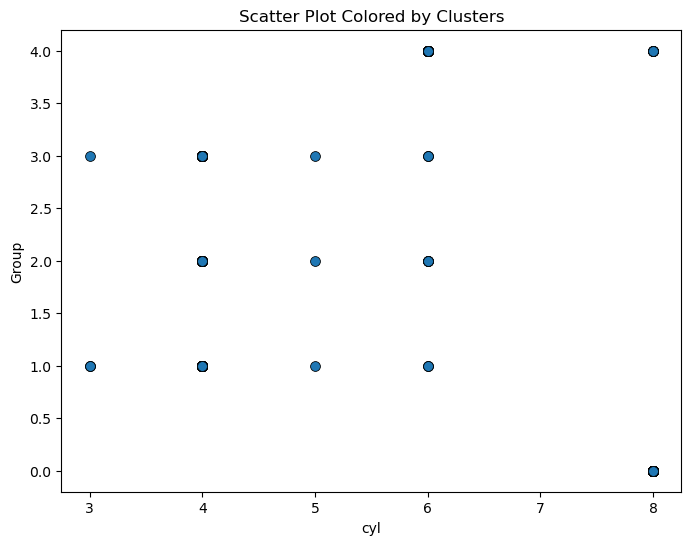

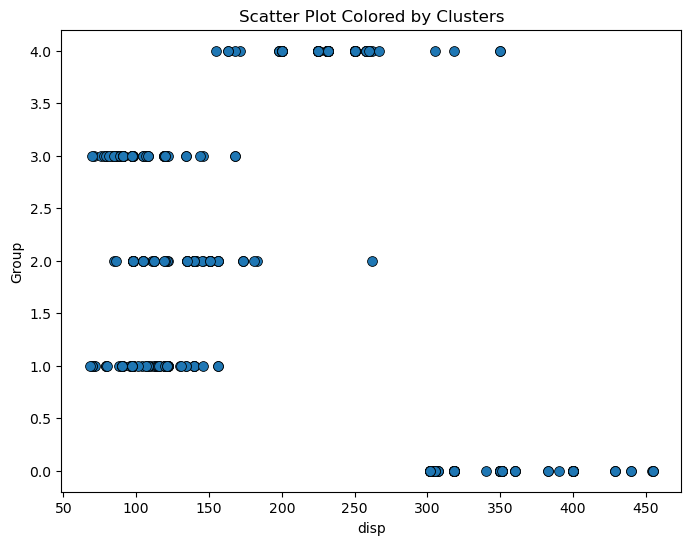

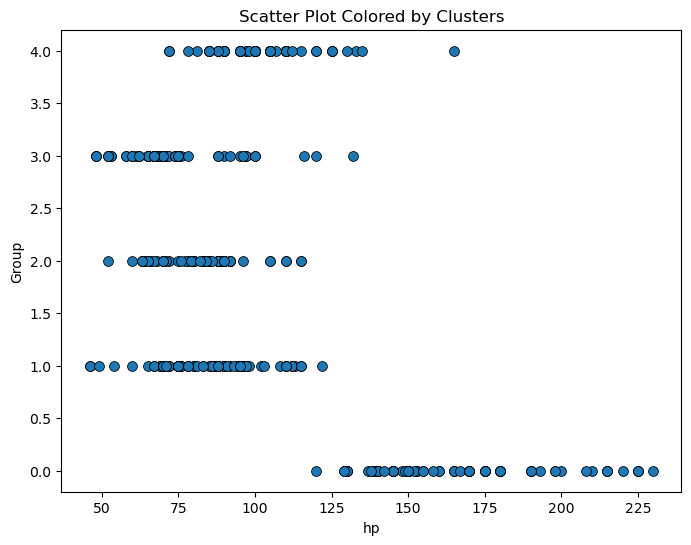

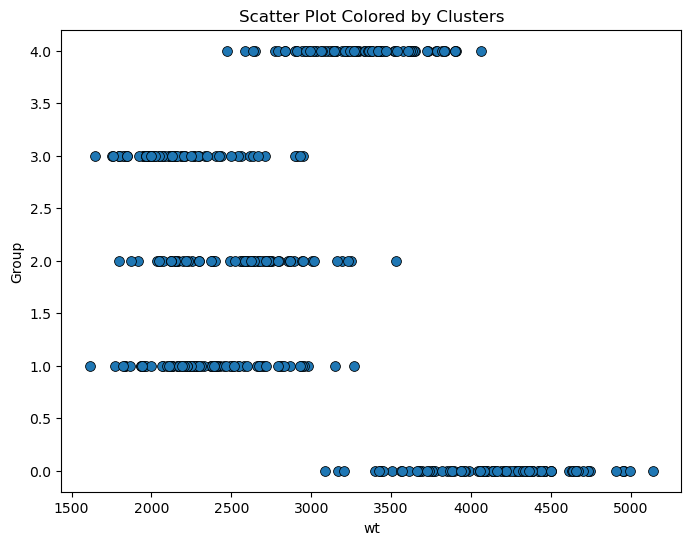

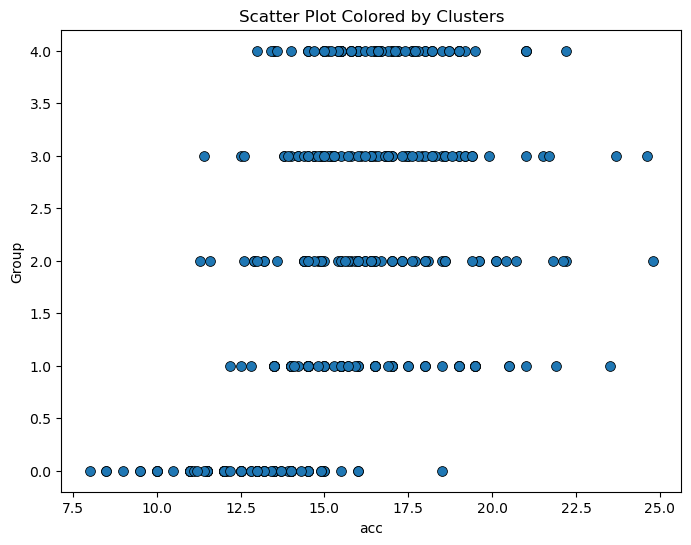

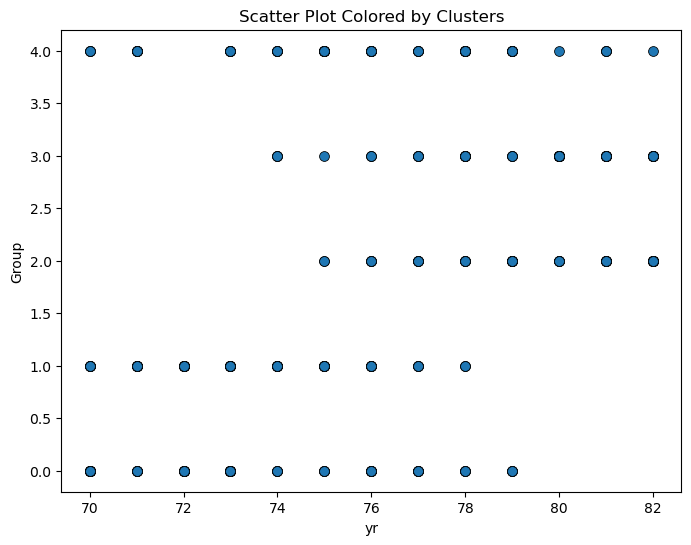

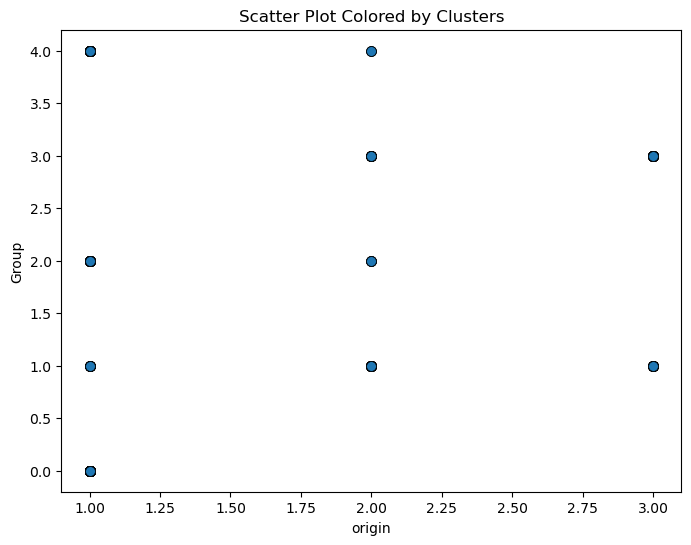

In [40]:
for i in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=car[i], y=car['Group'], data=car, palette='viridis', s=50, edgecolor='k')
    plt.title('Scatter Plot Colored by Clusters')
    plt.show()

In [41]:
carattributes2= car.iloc[:,1:-1] #select the columns except 'car_name' and 'Group'
carattributes2.head(5)
# defined all the numerical data into one data frame as 'carattributes2'
carscaled2= carattributes2.apply(zscore) #apply the zscore for standardization
new_datapoints= {'mpg': 33, 'cyl': 8, 'disp':130,'hp': 83, 'wt':2750, 'acc':18, 'yr': 80, 'origin':2 }
car_new= pd.DataFrame(new_datapoints, index=[1])
#created new data point for prediction.
best_model= KMeans(n_clusters=5)
best_model.fit(carscaled2)

KMeans(n_clusters=5)

In [42]:
car_new

,mpg,cyl,disp,hp,wt,acc,yr,origin
1,33,8,130,83,2750,18,80,2


In [43]:
new_predict= best_model.predict(car_new)
car_new['Group']= new_predict
car_new

,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
1,33,8,130,83,2750,18,80,2,0


#### Newly created data points from data frame 'Car_new', has been passed into the defined model of KMeans(n_clusters=5)
#### It is showing the it will fall under the cluster group '0', with the given data.
#### To run this code, I have trained 'carscaled2' similar to 'carscaled' and test the new data points and made the ['Group'] column.

## ----------- PART B ---------
### -------------- DOMAIN: Automobile     ------------

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
vehicle= pd.read_csv('vehicle.csv')
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [46]:
vehicle.shape

(846, 19)

In [47]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [48]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [49]:
vehicle_data= vehicle.dropna(axis=0, inplace=True)

In [50]:
vehicle.isnull().sum()

#no null now.

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [51]:
class_counts= vehicle['class'].value_counts()

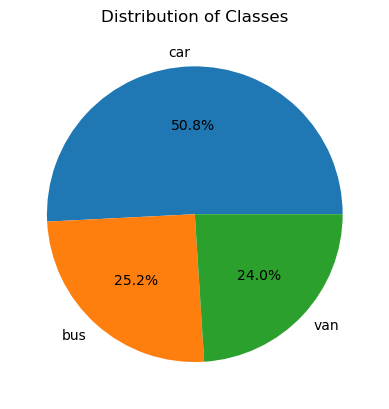

In [52]:
# Plot a pie chart
plt.pie(class_counts,labels= class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Classes')
plt.show()

### There are 3 classes in the Data set. 
    
    Car = 50.8%
    Bus = 25.2%
    Van = 24%

In [53]:
print("Percentage of values for 'class':")
print((class_counts / len(vehicle['class'])) * 100)

Percentage of values for 'class':
car    50.799508
bus    25.215252
van    23.985240
Name: class, dtype: float64


In [54]:
vehicle.duplicated().sum()

# there are no duplicated rows in the dataset

0

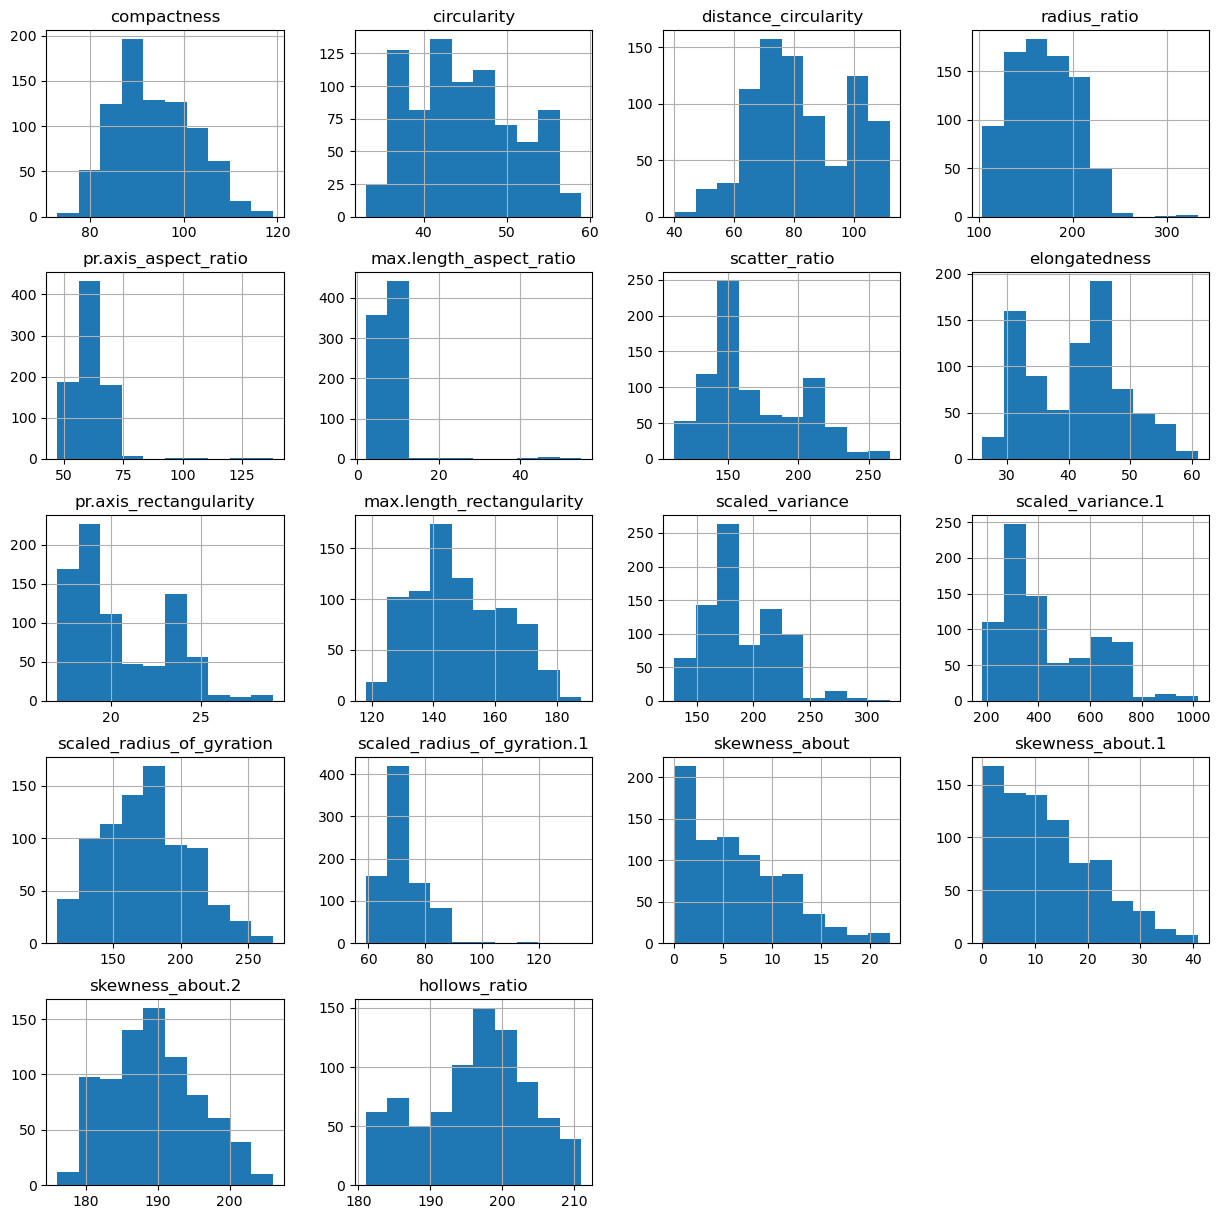

In [55]:
vehicle.hist(figsize=(15,15));

#distribution of the data

## Data Preparation and Standardization

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
# In this Data frame, 'Class' column is the target variable.

#Defining X and Y

X= vehicle.drop(['class'], axis=1)
y= vehicle['class']
#standardize

from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

y.replace(['car','bus','van'],[1,2,3],inplace=True)
print(y.head())

0    3
1    3
2    1
3    3
4    2
Name: class, dtype: int64


In [58]:
#split the data

X_train, X_test, y_train, y_test= train_test_split(XScaled,y,test_size=0.25, random_state=1)

#checking the split
X_train.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
442,-0.322874,-1.433074,-1.397486,-1.282892,-0.724754,-0.556023,-1.499111,1.924847,-1.383740,-1.234278,-1.585324,-1.298123,-1.740891,-0.722724,-0.071523,0.147109,0.491213,0.307078
832,1.743070,0.683198,1.709018,1.038901,-0.097251,0.513657,1.313801,-1.280865,1.338300,0.766312,1.304228,1.293755,1.261064,-0.187348,1.961638,-0.189159,0.166004,0.442318
278,1.864596,1.497149,1.709018,1.663999,0.781252,0.513657,1.374293,-1.280865,1.338300,1.456170,1.207909,1.350845,1.168220,-0.588880,0.945058,2.164716,0.003400,0.848040
742,-0.444400,-0.619123,-0.256321,-0.717327,-0.850254,-0.342087,-0.924430,0.899019,-0.994877,-0.682391,-0.878989,-0.881367,-0.502972,-0.722724,-1.291420,-1.310052,0.491213,0.171837
203,1.135439,1.659939,1.138435,0.741235,0.028249,0.513657,1.313801,-1.280865,1.338300,1.870085,0.918954,1.299464,1.384856,0.080339,0.741741,0.147109,-0.321809,-0.233885


### Train basic SVM and check metics

In [59]:
svm1=SVC()
svm1.fit(X_train,y_train)

y_pred=svm1.predict(X_test)

print('Accuracy Score:')

print(accuracy_score(y_test,y_pred))

print('-------------------------------------------------------')
print('-------------------------------------------------------')


print('CONFUSION MATRIX')

print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')

print("CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')


Accuracy Score:
0.9558823529411765
-------------------------------------------------------
-------------------------------------------------------
CONFUSION MATRIX
[[110   0   5]
 [  0  42   3]
 [  1   0  43]]
-------------------------------------------------------
-------------------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.99      0.96      0.97       115
           2       1.00      0.93      0.97        45
           3       0.84      0.98      0.91        44

    accuracy                           0.96       204
   macro avg       0.94      0.96      0.95       204
weighted avg       0.96      0.96      0.96       204

-------------------------------------------------------
-------------------------------------------------------


## Apply PCA 

In [60]:
from sklearn.decomposition import PCA
pca1= PCA(n_components=10)
pca1.fit(XScaled)

PCA(n_components=10)

In [61]:
cumulative_variance = pca1.explained_variance_ratio_.cumsum()
len(cumulative_variance)

10

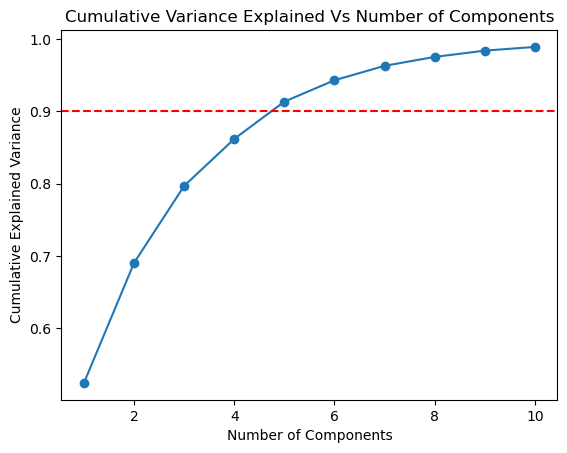

In [62]:
plt.plot(range(1,11), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained Vs Number of Components')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance Threshold') #thresholdline to mention above 90%
plt.show()

In [63]:
#Apply PCA on the data. Select Minimum Components with 90% or above variance explained.
pca2= PCA(n_components=0.9)
pca2.fit(XScaled)
print(pca2.explained_variance_ratio_)
X_pca2= pca2.transform(XScaled)

[0.52454218 0.16588564 0.10640714 0.06492654 0.05155287]


In [64]:
#split data after PCA(n_components= 0.9)
X_train, X_test, y_train, y_test= train_test_split(X_pca2, y,test_size=0.25, random_state=1)
#Train SVM model on selected components
svmpca1= SVC()
svmpca1.fit(X_train, y_train)
y_predPCA= svmpca1.predict(X_test)
print(y_predPCA)


[2 2 1 3 3 1 1 1 1 1 1 3 3 2 3 1 1 1 3 1 3 1 1 1 1 3 2 3 1 2 1 1 3 2 1 1 3
 2 3 1 1 1 1 1 2 3 1 3 3 3 2 3 1 1 3 2 3 1 1 1 3 1 3 1 3 1 1 3 2 3 1 1 1 1
 1 3 1 1 2 1 1 1 2 2 2 1 3 3 1 2 1 3 2 1 3 1 1 1 3 2 1 1 3 1 1 1 1 1 2 2 2
 1 1 1 1 1 3 1 3 3 1 3 1 2 1 1 3 1 3 3 1 3 2 1 1 1 3 3 1 3 2 3 1 1 1 1 3 1
 1 3 1 3 1 3 1 1 3 1 2 1 1 3 1 3 2 2 1 1 1 1 1 3 3 1 3 3 3 1 1 2 3 3 3 1 1
 3 2 1 1 1 3 1 3 1 1 2 3 1 3 3 3 1 1 3]


In [65]:

print('Accuracy Score:')

print(accuracy_score(y_test,y_predPCA))

print('-------------------------------------------------------')
print('-------------------------------------------------------')


print('CONFUSION MATRIX')

print(confusion_matrix(y_test, y_predPCA))
print('-------------------------------------------------------')
print('-------------------------------------------------------')

print("CLASSIFICATION REPORT")
print(classification_report(y_test, y_predPCA))
print('-------------------------------------------------------')
print('-------------------------------------------------------')

Accuracy Score:
0.7745098039215687
-------------------------------------------------------
-------------------------------------------------------
CONFUSION MATRIX
[[93  2 20]
 [12 26  7]
 [ 3  2 39]]
-------------------------------------------------------
-------------------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.86      0.81      0.83       115
           2       0.87      0.58      0.69        45
           3       0.59      0.89      0.71        44

    accuracy                           0.77       204
   macro avg       0.77      0.76      0.75       204
weighted avg       0.80      0.77      0.78       204

-------------------------------------------------------
-------------------------------------------------------


### Accuracy score has been improved from overfitting to reduced.

    Basic SVM model accuracy score= 0.96
    SVM model after pca components applied = 0.77

## Performance Improvement:

#### PERFORMANCE IMROVEMENT of basic SVM model without PCA

In [66]:
X_train, X_test, y_train, y_test= train_test_split(XScaled, y, test_size=0.25, random_state=1)
# Improvement of this basic SVM model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm2= SVC()

GridS = GridSearchCV(svm2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
GridS.fit(X_train, y_train)

Best_parameters= GridS.best_params_
print('The best Parameters observed from above step:')
print(pd.DataFrame(Best_parameters, index=[1]))



The best Parameters observed from above step:
    C  gamma kernel
1  10  scale    rbf


In [67]:
Bestbasic_SVM_model= GridS.best_estimator_
y_predSVMHT= Bestbasic_SVM_model.predict(X_test)
print(y_predSVMHT)

[2 2 1 1 3 1 1 1 1 1 1 3 3 3 3 1 1 1 3 1 3 1 2 1 1 3 3 3 1 2 3 2 1 2 3 1 2
 2 3 1 1 1 1 2 2 2 1 3 3 3 2 1 1 2 1 3 1 1 1 1 1 1 1 1 3 1 1 1 2 3 1 1 1 1
 1 3 1 2 2 1 1 2 2 2 2 1 3 1 1 2 1 2 2 1 3 1 1 1 3 1 1 2 3 1 1 1 1 1 2 3 1
 2 1 3 1 1 3 1 2 1 1 1 1 2 2 1 1 1 3 3 1 3 2 1 1 1 1 3 1 2 2 3 1 1 1 1 1 1
 1 3 1 3 1 3 2 1 1 1 2 1 1 3 1 3 2 2 2 1 1 1 1 2 3 1 1 3 3 1 1 2 1 3 3 1 1
 3 2 1 2 1 3 1 3 1 1 2 3 1 3 3 3 1 1 3]


In [68]:
### Model after using Hyper parameter tuning to find the best parameters


print('Accuracy Score:')

print(accuracy_score(y_test,y_predSVMHT))

print('-------------------------------------------------------')
print('-------------------------------------------------------')


print('CONFUSION MATRIX')

print(confusion_matrix(y_test, y_predSVMHT))
print('-------------------------------------------------------')
print('-------------------------------------------------------')

print("CLASSIFICATION REPORT")
print(classification_report(y_test, y_predSVMHT))
print('-------------------------------------------------------')
print('-------------------------------------------------------')

Accuracy Score:
0.9607843137254902
-------------------------------------------------------
-------------------------------------------------------
CONFUSION MATRIX
[[111   0   4]
 [  0  42   3]
 [  1   0  43]]
-------------------------------------------------------
-------------------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       115
           2       1.00      0.93      0.97        45
           3       0.86      0.98      0.91        44

    accuracy                           0.96       204
   macro avg       0.95      0.96      0.95       204
weighted avg       0.96      0.96      0.96       204

-------------------------------------------------------
-------------------------------------------------------


In [69]:
## PERFORMANCE IMPROVEMENT OF SVM model after PCA

X_train, X_test, y_train, y_test= train_test_split(X_pca2, y,test_size=0.25, random_state=1)
#Train SVM model on selected PCA components
svmpca2= SVC()
svmpca2.fit(X_train, y_train)
y_predsvmpca2= svmpca2.predict(X_test)

# Improvement of this SVM Model on selected PCA components
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm4= SVC()

GridS1 = GridSearchCV(svmpca2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
GridS1.fit(X_train, y_train)

Best_parameters2= GridS1.best_params_
print('The best Parameters observed after SVM on selected PCA components:')
print(pd.DataFrame(Best_parameters2, index=[1]))

The best Parameters observed after SVM on selected PCA components:
     C  gamma kernel
1  100  scale    rbf


In [70]:
Best_SVMPCA_model= GridS1.best_estimator_
y_predSVMPCA= Best_SVMPCA_model.predict(X_test)
print(y_predSVMPCA)

[2 2 1 1 3 1 1 1 1 1 1 3 3 2 2 1 1 1 3 1 3 1 2 1 1 3 3 3 1 2 1 2 1 2 1 1 2
 2 3 1 1 1 1 1 2 2 1 3 3 3 2 3 1 1 3 2 1 1 1 1 3 2 3 3 3 1 1 3 2 3 1 1 1 1
 1 3 1 1 3 1 1 3 2 1 2 1 3 3 1 2 1 2 2 1 3 1 1 1 3 3 1 2 3 1 1 1 1 1 2 2 1
 1 1 3 1 1 3 1 1 3 1 3 1 2 2 1 3 1 3 3 1 3 2 1 1 1 1 3 1 3 2 1 1 1 1 2 1 1
 1 3 1 2 1 3 3 1 1 1 2 1 1 3 1 3 2 2 3 1 1 1 1 2 3 1 1 1 3 1 1 2 3 3 3 1 1
 3 2 1 2 1 3 1 3 1 1 2 3 2 3 3 2 1 1 3]


In [71]:
### Model after using Hyper parameter tuning to find the best parameters


print('Accuracy Score:')

print(accuracy_score(y_test,y_predSVMPCA))

print('-------------------------------------------------------')
print('-------------------------------------------------------')


print('CONFUSION MATRIX')

print(confusion_matrix(y_test, y_predSVMPCA))
print('-------------------------------------------------------')
print('-------------------------------------------------------')

print("CLASSIFICATION REPORT")
print(classification_report(y_test, y_predSVMPCA))
print('-------------------------------------------------------')
print('-------------------------------------------------------')

Accuracy Score:
0.8137254901960784
-------------------------------------------------------
-------------------------------------------------------
CONFUSION MATRIX
[[97  3 15]
 [ 6 33  6]
 [ 4  4 36]]
-------------------------------------------------------
-------------------------------------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.91      0.84      0.87       115
           2       0.82      0.73      0.78        45
           3       0.63      0.82      0.71        44

    accuracy                           0.81       204
   macro avg       0.79      0.80      0.79       204
weighted avg       0.83      0.81      0.82       204

-------------------------------------------------------
-------------------------------------------------------


In [72]:
models= {'Model':['Basic SVM Classification','SVM after Hypertuning', 'SVM After PCA', 'SVM model Hypertuning after PCA'], 
         'Accuracy': [accuracy_score(y_test,y_pred),accuracy_score(y_test,y_predSVMHT), accuracy_score(y_test,y_predPCA), accuracy_score(y_test, y_predSVMPCA)] }
table= pd.DataFrame(models,index=[1,2,3,4])
table

,Model,Accuracy
1,Basic SVM Classification,0.955882
2,SVM after Hypertuning,0.960784
3,SVM After PCA,0.774510
4,SVM model Hypertuning after PCA,0.813725


### From the above comparision, we could say that SVM model which is used PCA has given the best accuracy score without overfitting after hypertuning the parameters.

### Pre-requisite/ Assumptions of PCA

PCA have some specification to enhancement the model. Those are crucial to import PCA.

1. PCA takes linear relationships between variables 
2. It is designed for numeric data, requiring mean-centering before application. 
3. PCA more sensitive to variable scales/units, so the importance of standardization needs to be done. 
4. Larger datasets enhance PCA performance, and the existence of eigenvalues and eigenvectors is essential. 
5. The assumption of linear independence of variables should be considered, especially with highly correlated variables.
6. And PCA is sensitive to outliers.

## Advantages and Disadvantages of PCA

#### Advantages:
    
1. PCA have advantages such as effective (i.) dimensionality reduction, (ii.) Decorrelation of features, and (iii.) Improvement in data visualization.
2. It helps in noise reduction and identifies essential features that will lead to enhancement of our machine learning model's performance. 
3. PCA works better with the Large Dataset.
------------------------------------------------------------------------------------------------------------------

#### Limitation/ Disadvantages:

1. However, PCA assumes linearity and is sensitive to outliers (In above dataset, outliers are not much in the state to affect PCA). 
2. Interpretability can be challenging, especially with a large number of features, and careful consideration is needed when selecting the number of components. 
3. Additionally, PCA might not effectively capture complex nonlinear relationships. 
4. As PCA is reducing noise of the data, some times it leads to loss of information.
5. Understanding its strengths and limitations is important in diverse model buildiing scenarios.